In [25]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,  Flatten

In [26]:
def prepare_data(timeseries_data, n_features):
    X,y = [], []
    for i in range(len(timeseries_data)):
        end_ix = i + n_features
        
        if end_ix > len(timeseries_data) - 1:
            break
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X),np.array(y)

In [27]:
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]

n_steps = 3

X,y = prepare_data(timeseries_data, n_steps)

In [28]:
X

array([[110, 125, 133],
       [125, 133, 146],
       [133, 146, 158],
       [146, 158, 172],
       [158, 172, 187],
       [172, 187, 196]])

In [29]:
y

array([146, 158, 172, 187, 196, 210])

In [30]:
X.shape

(6, 3)

In [31]:
n_features = 1
X = X.reshape((X.shape[0],X.shape[1],n_features))

In [32]:
X.shape

(6, 3, 1)

### Building LSTM Model

In [39]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
#fit model

model.fit(X,y , epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 31746.6973
Epoch 2/300
1/1 [==============================] - 0s 5ms/step - loss: 31280.1074
Epoch 3/300
1/1 [==============================] - 0s 3ms/step - loss: 30821.9922
Epoch 4/300
1/1 [==============================] - 0s 3ms/step - loss: 30389.4043
Epoch 5/300
1/1 [==============================] - 0s 7ms/step - loss: 29957.3691
Epoch 6/300
1/1 [==============================] - 0s 3ms/step - loss: 29495.5684
Epoch 7/300
1/1 [==============================] - 0s 3ms/step - loss: 28992.6543
Epoch 8/300
1/1 [==============================] - 0s 5ms/step - loss: 28449.2715
Epoch 9/300
1/1 [==============================] - 0s 4ms/step - loss: 27865.0137
Epoch 10/300
1/1 [==============================] - 0s 3ms/step - loss: 27228.6660
Epoch 11/300
1/1 [==============================] - 0s 3ms/step - loss: 26506.7812
Epoch 12/300
1/1 [==============================] - 0s 5ms/step - loss: 25648.0254
Epoch 13/300
1

1/1 [==============================] - 0s 4ms/step - loss: 16.6763
Epoch 103/300
1/1 [==============================] - 0s 4ms/step - loss: 16.4322
Epoch 104/300
1/1 [==============================] - 0s 4ms/step - loss: 16.2471
Epoch 105/300
1/1 [==============================] - 0s 4ms/step - loss: 16.1279
Epoch 106/300
1/1 [==============================] - 0s 3ms/step - loss: 16.0668
Epoch 107/300
1/1 [==============================] - 0s 3ms/step - loss: 16.0487
Epoch 108/300
1/1 [==============================] - 0s 5ms/step - loss: 16.0553
Epoch 109/300
1/1 [==============================] - 0s 4ms/step - loss: 16.0700
Epoch 110/300
1/1 [==============================] - 0s 3ms/step - loss: 16.0797
Epoch 111/300
1/1 [==============================] - 0s 3ms/step - loss: 16.0756
Epoch 112/300
1/1 [==============================] - 0s 5ms/step - loss: 16.0537
Epoch 113/300
1/1 [==============================] - 0s 4ms/step - loss: 16.0143
Epoch 114/300
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 3.5825
Epoch 205/300
1/1 [==============================] - 0s 3ms/step - loss: 3.5720
Epoch 206/300
1/1 [==============================] - 0s 3ms/step - loss: 3.5578
Epoch 207/300
1/1 [==============================] - 0s 4ms/step - loss: 3.5420
Epoch 208/300
1/1 [==============================] - 0s 5ms/step - loss: 3.5271
Epoch 209/300
1/1 [==============================] - 0s 4ms/step - loss: 3.5044
Epoch 210/300
1/1 [==============================] - 0s 3ms/step - loss: 3.4838
Epoch 211/300
1/1 [==============================] - 0s 3ms/step - loss: 3.4794
Epoch 212/300
1/1 [==============================] - 0s 5ms/step - loss: 3.4999
Epoch 213/300
1/1 [==============================] - 0s 4ms/step - loss: 3.4811
Epoch 214/300
1/1 [==============================] - 0s 3ms/step - loss: 3.4386
Epoch 215/300
1/1 [==============================] - 0s 3ms/step - loss: 3.4432
Epoch 216/300
1/1 [==============================] - 0

### predict for the next 10 data

In [46]:
x_input = np.array([187, 196, 210])
temp_input = list(x_input)
lst_output = []

i = 0 

while(i<10):
    
    if(len(temp_input) > 3):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape(1,n_steps,n_features)
        #print(x_input)
        yhat = model.predict(x_input , verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        #print(temp_output)
        lst_output.append(yhat[0][0])
        i += 1 
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1 

[222.74348]
1 day input [196.        210.        222.7434845]
1 day output [[234.1492]]
2 day input [210.         222.7434845  234.14920044]
2 day output [[247.43814]]
3 day input [222.74348 234.1492  247.43814]
3 day output [[260.2869]]
4 day input [234.1492  247.43814 260.2869 ]
4 day output [[273.25482]]
5 day input [247.43814 260.2869  273.25482]
5 day output [[287.1958]]
6 day input [260.2869  273.25482 287.1958 ]
6 day output [[301.2714]]
7 day input [273.25482 287.1958  301.2714 ]
7 day output [[315.88373]]
8 day input [287.1958  301.2714  315.88373]
8 day output [[331.24573]]
9 day input [301.2714  315.88373 331.24573]
9 day output [[347.0876]]


In [47]:
lst_output

[222.74348,
 234.1492,
 247.43814,
 260.2869,
 273.25482,
 287.1958,
 301.2714,
 315.88373,
 331.24573,
 347.0876]

In [48]:
import matplotlib.pyplot as plt

In [50]:
day_new = np.arange(1,10)
day_pred = np.arange(10,20)

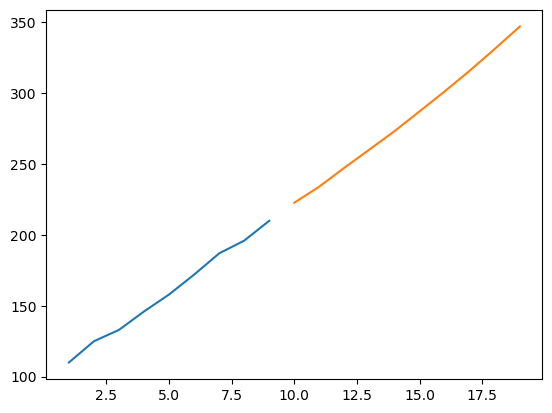

In [51]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred, lst_output)